# Fake Note Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-note-auth.csv')

## Mean and Std Dev Calculations

In [3]:
mean = np.mean(data, 0)

std_dev = np.std(data, 0)

Based on the data visualisation and analysis, I feel K-Means clustering is suitable for this dataset as it meets conditions like the data charecteristics in both v1 and v2 being numeric. k means is appropriate when trying to find similarity and proximity, since we have class targets, we can utilise k means to match against these targets.

## Standardising the Data

In [4]:
mean = np.mean(data, 0)  # Calculate the mean for each column
std_dev = np.std(data, 0)  # Calculate the standard deviation for each column

data = (data - mean) / std_dev  # Standardization formula for both columns

## Initialise Random Centroids

In [5]:
def random_centroids(data, k): #2 inputs it needs data and number ok k (clusters)
    centroids = [] # results will append to this
    for i in range(k): #range = number of k (clusters)
        centroid = data.apply(lambda x: float(x.sample())) # This code randomly selects one value from each column of the 'standardized' DataFrame and converts it into a decimal number, creating a new DataFrame with these random values.
        centroids.append(centroid) # takes the sample from step before and adds it to the centroids list
    return pd.concat(centroids, axis=1) # Now both seperates series of clusters sample

In [6]:
centroids = random_centroids(data, 2) # Running the function above with data = standardized and 2 clusters (k)

C:\Users\User\AppData\Local\Temp\ipykernel_5028\77384410.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) # This code randomly selects one value from each column of the 'standardized' DataFrame and converts it into a decimal number, creating a new DataFrame with these random values.


In [7]:
centroids

,0,1
V1,-0.095067,-0.424606
V2,0.276525,-0.274757


## Finding cluster labels for each data points

In [8]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) #Using Euclidean formula this counts distance from Standardized data piunts to centroid
    return distances.idxmin(axis=1) # This code finds the index (row) in the 'distances' where distance is smallest for each datapoint, basically assigning each data point to nearest centroid

In [9]:
labels = get_labels(data, centroids)

In [10]:
labels

0       0
1       0
2       0
3       0
4       1
       ..
1367    0
1368    1
1369    1
1370    1
1371    1
Length: 1372, dtype: int64

## Updating Centroid Values
##### Update the centroid based on the V1 and V2 data in clusters. So what i'm going to do is find all the data in clusters and take the geometry mean of each feature

In [11]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T # It will take the natural log of each row's data points (V1 and V2 data of row), then find mean of all the values in a row, and lastly, it will do e to that value which brings us the geometric mean. Apply it to each of our labels.

## Plotting k-means interations

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
def plot_clusters(data, labels, centroids, iteration):
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data['V1'], y=data['V2'], c=labels)
    plt.scatter(x=centroids[0], y=centroids[1])
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5028\77384410.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) # This code randomly selects one value from each column of the 'standardized' DataFrame and converts it into a decimal number, creating a new DataFrame with these random values.
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


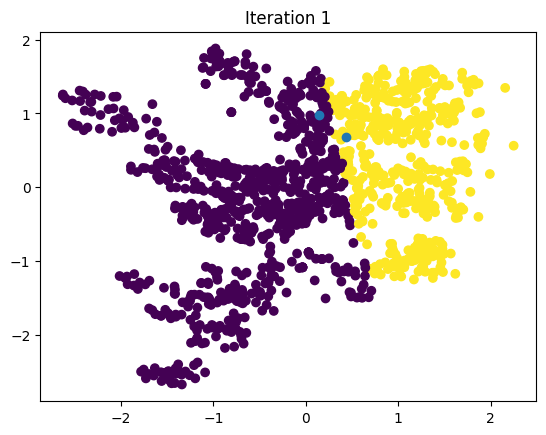

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


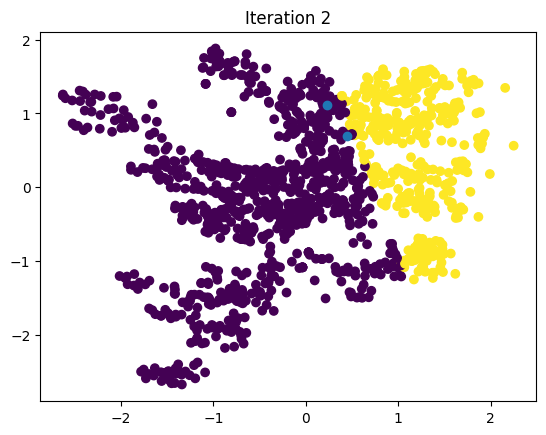

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


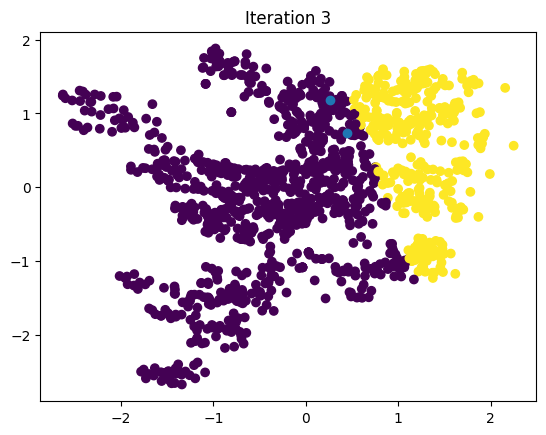

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


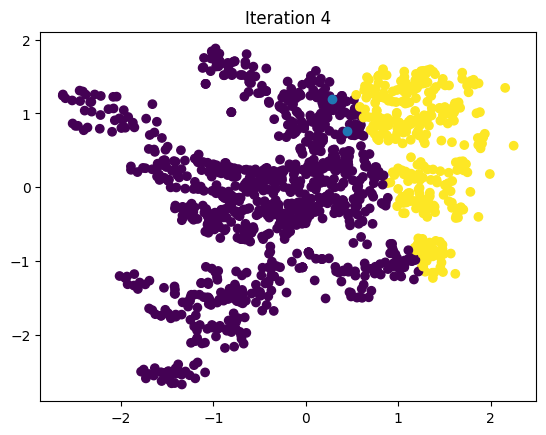

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


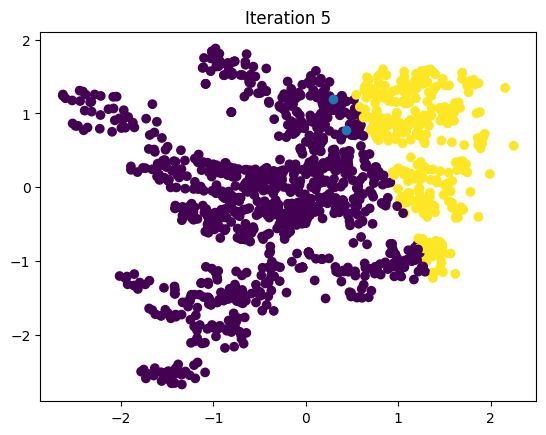

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


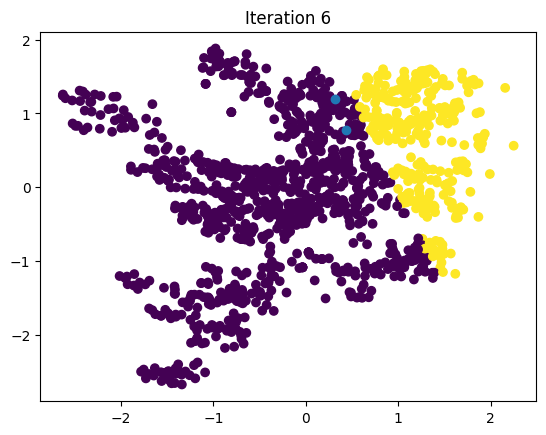

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


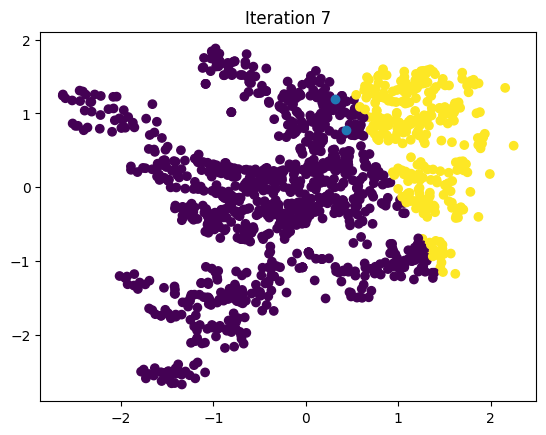

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


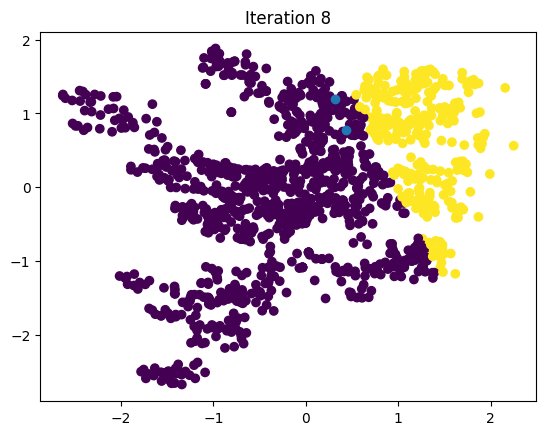

In [16]:
max_iterations = 100
k = 2

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1